# Prediction using unsupervised ML
working on 'Iris' dataset

In [76]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets

In [17]:
#Loading dataset 
iris = datasets.load_iris()

In [18]:
type(iris)

sklearn.utils.Bunch

In [29]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

In [68]:
np.ndim(iris.target[:5])

1

In [85]:
np.ndim(iris.data)
# iris.data

2

In [32]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [47]:
iris_df = pd.DataFrame(iris.data, columns= iris.feature_names)

In [48]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [71]:
specie = pd.DataFrame({'Specie':iris.target})
specie.head()

,Specie
0,0
1,0
2,0
3,0
4,0


In [79]:
sns.set(style = 'darkgrid')

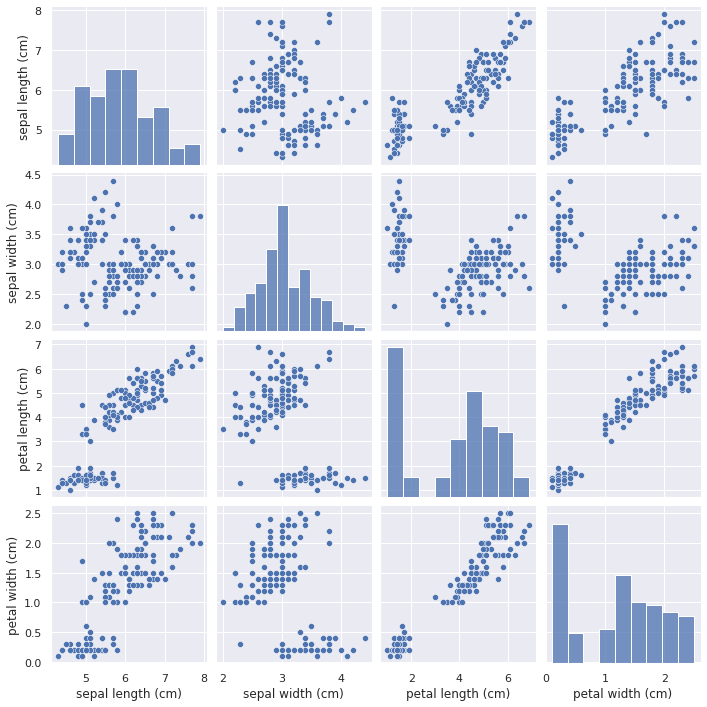

In [80]:
sns.pairplot(iris_df)

In [58]:
X = iris.data[:,:]
y = iris.target

In [57]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

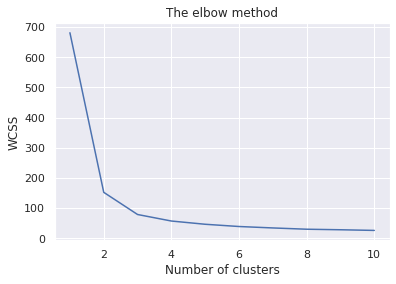

In [82]:
# Finding the optimum number of clusters for k-means classification


from sklearn.cluster import KMeans
wcss = [] # array of within cluster sum of squares

for i in range(1, 11): #10 iterations
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

we can see the elbow at 3

In [112]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [113]:
specie['predicted_specie'] = pd.DataFrame({'Predicted Specie':y_kmeans})
specie.head()

,Specie,predicted_specie
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [93]:
#Calculating error
from sklearn.metrics import mean_squared_error

#### Error 

In [95]:
mean_squared_error(specie.Specie,specie.predicted_specie)

1.04

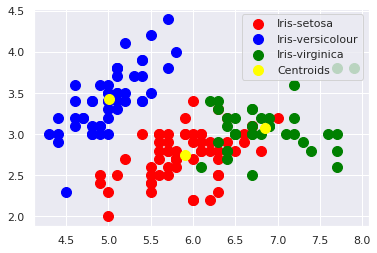

In [101]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()


##  Preprocessing the data (normalization)

In [139]:
from sklearn.preprocessing import Normalizer

normalized = Normalizer().fit_transform(X) + 0.5 #adding domr bias
y_kmeans_normalized = kmeans.fit_predict(normalized)

#### Error 

In [140]:
mean_squared_error(specie.Specie,pd.DataFrame({'normalized':y_kmeans_normalized}))

0.6333333333333333

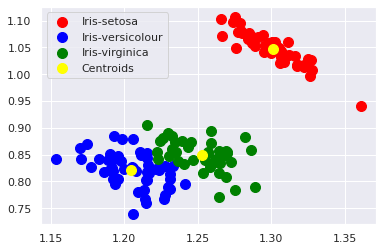

In [141]:
plt.scatter(normalized[y_kmeans_normalized == 0, 0], normalized[y_kmeans_normalized == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(normalized[y_kmeans_normalized == 1, 0], normalized[y_kmeans_normalized == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(normalized[y_kmeans_normalized == 2, 0], normalized[y_kmeans_normalized == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

In [121]:
std_normalized = StandardScaler().fit_transform(X)
y_kmeans_std_normalized = kmeans.fit_predict(std_normalized)

### Error

In [122]:
mean_squared_error(specie.Specie,pd.DataFrame({'normalized':y_kmeans_std_normalized}))

1.04

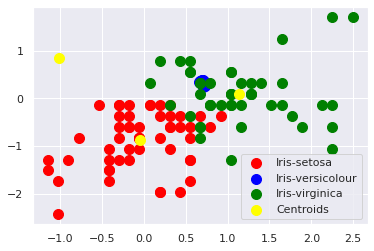

In [129]:
plt.scatter(std_normalized[y_kmeans_std_normalized== 0, 0], std_normalized[y_kmeans_std_normalized == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(normalized[y_kmeans_normalized == 1, 0], normalized[y_kmeans_normalized == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(std_normalized[y_kmeans_std_normalized == 2, 0], std_normalized[y_kmeans_std_normalized == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()